# Essential Machine Learning for Physicists

<p align="right">
  <img src="../../misc/tum-logo.png" width="93" align="right" />
  <img src="../../misc/sixt-logo.png" width="70" align="right" /> 
<left><em>&copy; Zinonas Zinonos</em></left>
    
<left><em>For more information, visit <a href='https://github.com/zinon/essential-machine-learning-for-physicists'>essential-machine-learning-for-physicists</a></em></left>.
___
</p>

# Decision Trees - Classification - Problem

# About the Dataset

The dataset was developed by starting with satellite images of the ocean, some of which contain an oil spill and some that do not.
Images were split into sections and processed using computer vision algorithms to provide a vector of features to describe the contents of the image section or patch. The task is, given a vector that describes the contents of a patch of a satellite image, then predicts whether the patch contains an oil spill or not, e.g. from the illegal or accidental dumping of oil in the ocean.

There are two data classes and the goal is to distinguish between spill and non-spill using the features for a given ocean patch:

- Non-Spill: negative case, or majority class.
- Oil Spill: positive case, or minority class.

Image processing techniques are used to derive features vectors for ocean patch. The output of the image processing is a fixed-length feature vector for each suspicious region used to classify whether the region contain an oil spill or not.

## Licence
CC0: Public Domain

# Your Task

You develop your own predictive model using the Decision Trees Classifier from sklearn. You are challenged to deliver the best model that predicts ocean patches as oil spills or not. Given this binary classification problem, consider the following rules and tips while optimizing your model:

1. perform the necessary data exploration and preparation, and get insights about the features before building your model
2. the target column is called "target"
3. the test set must have a size of 100 instances, the rest of the data instances must be used for training the model
4. for reproducibility purposes, use `7733` as random state
5. the winner algorithm delivers the highest ROC-AUC score (up to 4 precision digits) - report your achievement to us!

The dataset is called `oil_spill.csv` and is located in the `datasets/` folder.

<img src="../../misc/oil-spill.jpg" width="600" /> 

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../datasets//oil_spill.csv")

In [3]:
df.sample(5)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
439,7,225,446.76,1540.46,178,316406,23.42,7.44,2705.0,0.32,...,0.00,0.00,0.00,0.00,0.00,0,12150.70,36.32,14.91,0
581,13,37,6.08,483.70,51,299700,53.49,10.31,2255.0,0.19,...,900.00,254.56,175.01,94.70,5.14,0,6502.69,65.97,6.00,0
529,35,99,678.73,1892.56,163,139218,30.63,6.28,2489.0,0.20,...,0.00,0.00,0.00,0.00,0.00,0,9881.46,36.50,14.81,0
507,13,166,421.09,467.55,82,233437,22.30,13.85,3890.5,0.62,...,1548.89,187.50,102.44,46.71,15.12,1,14866.85,36.23,15.33,0
201,7,91,795.40,1240.82,71,227500,29.64,5.63,3330.0,0.19,...,1486.61,316.23,100.17,75.54,14.84,0,18827.22,66.01,6.91,0


In [4]:
df.dtypes

f_1         int64
f_2         int64
f_3       float64
f_4       float64
f_5         int64
f_6         int64
f_7       float64
f_8       float64
f_9       float64
f_10      float64
f_11      float64
f_12      float64
f_13      float64
f_14      float64
f_15      float64
f_16      float64
f_17      float64
f_18      float64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23        int64
f_24      float64
f_25      float64
f_26      float64
f_27      float64
f_28      float64
f_29      float64
f_30      float64
f_31      float64
f_32      float64
f_33      float64
f_34      float64
f_35        int64
f_36        int64
f_37      float64
f_38      float64
f_39        int64
f_40        int64
f_41      float64
f_42      float64
f_43      float64
f_44      float64
f_45      float64
f_46        int64
f_47      float64
f_48      float64
f_49      float64
target      int64
dtype: object

In [5]:
df.isna().any().any()

np.False_

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
f_1,937.0,81.588047,6.497673e+01,1.00,31.00,64.00,124.00,352.00
f_2,937.0,332.842049,1.931939e+03,10.00,20.00,65.00,132.00,32389.00
f_3,937.0,698.707086,5.999656e+02,1.92,85.27,704.37,1223.48,1893.08
f_4,937.0,870.992209,5.227993e+02,1.00,444.20,761.28,1260.37,2724.57
f_5,937.0,84.121665,4.536177e+01,0.00,54.00,73.00,117.00,180.00
f_6,937.0,769696.378869,3.831151e+06,70312.00,125000.00,186300.00,330468.00,71315000.00
f_7,937.0,43.242721,1.271840e+01,21.24,33.65,39.97,52.42,82.64
f_8,937.0,9.127887,3.588878e+00,0.83,6.75,8.20,10.76,24.69
f_9,937.0,3940.712914,8.167428e+03,667.00,1371.00,2090.00,3435.00,160740.00
f_10,937.0,0.221003,9.031555e-02,0.02,0.16,0.20,0.26,0.74


In [7]:
df = df.drop(labels="f_23", axis=1)

In [9]:
for col in df.drop("target", axis=1).select_dtypes(include=['int']).columns:
    print(col)
    print(df[col].value_counts(normalize=True))

f_1
f_1
2      0.009605
3      0.009605
6      0.009605
5      0.009605
9      0.009605
         ...   
198    0.001067
200    0.001067
202    0.001067
203    0.001067
204    0.001067
Name: proportion, Length: 238, dtype: float64
f_2
f_2
10       0.045891
12       0.038420
11       0.035219
15       0.025614
13       0.024546
           ...   
2899     0.001067
1655     0.001067
22325    0.001067
2558     0.001067
34       0.001067
Name: proportion, Length: 297, dtype: float64
f_5
f_5
90     0.023479
69     0.020277
66     0.019210
64     0.018143
70     0.017076
         ...   
116    0.001067
120    0.001067
143    0.001067
6      0.001067
156    0.001067
Name: proportion, Length: 179, dtype: float64
f_6
f_6
81000       0.045891
97200       0.038420
89100       0.035219
121500      0.025614
105300      0.024546
              ...   
296718      0.001067
882900      0.001067
1622500     0.001067
1212500     0.001067
55812500    0.001067
Name: proportion, Length: 375, dtype: float64
f_3

In [10]:
df["f_46"] = df["f_46"].astype("object")

In [11]:
df.select_dtypes(include=['object']).nunique()

f_46    2
dtype: int64

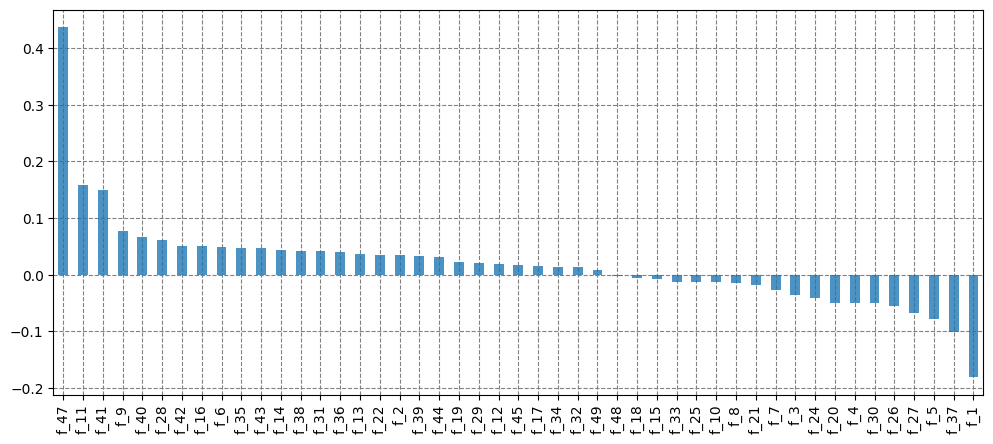

In [12]:
fig, ax = plt.subplots(figsize=(12,5))  
df.corr(numeric_only=True)['target'][:-1].sort_values(ascending=False).plot(kind='bar',alpha=0.8)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed');

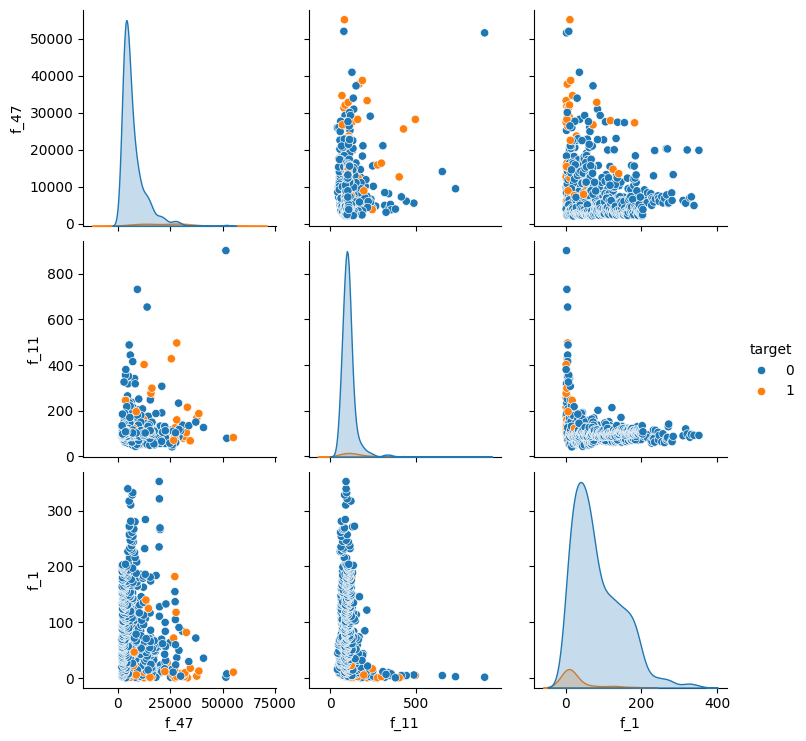

In [13]:
sns.pairplot(df[["f_47", "f_11", "f_1", "target"]], hue='target');

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [16]:
X = df.drop('target', axis = 1)
y = df['target']

In [17]:
df.shape

(937, 49)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=7733)

In [19]:
X_train.shape, X_test.shape

((837, 48), (100, 48))

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [21]:
model = DecisionTreeClassifier()
std_scaler = StandardScaler()

In [22]:
numeric  = X.select_dtypes(exclude=['object']).columns.tolist()
categorical = X.select_dtypes(include=['object']).columns.tolist()

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_test_pred = model.predict(X_test)

In [31]:
y_test_proba = model.predict_proba(X_test)

In [33]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [35]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
cm

array([[92,  4],
       [ 3,  1]])

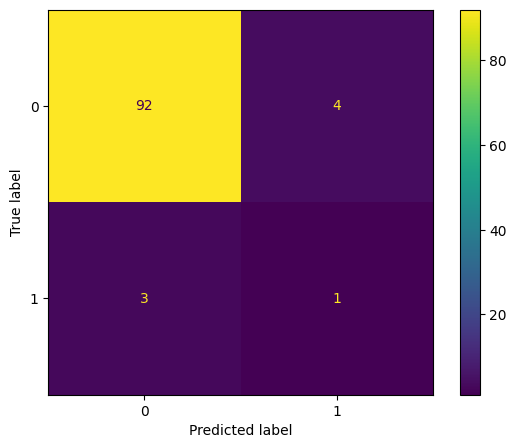

In [36]:
fig, ax = plt.subplots(figsize=(7,5))
cmd=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot(ax=ax);

In [37]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        96
           1       0.20      0.25      0.22         4

    accuracy                           0.93       100
   macro avg       0.58      0.60      0.59       100
weighted avg       0.94      0.93      0.93       100



In [38]:
from sklearn.model_selection import GridSearchCV
import os

In [40]:
param_grid = {
    'criterion': ['absolute_error', 'squared_error', 'gini'],
    'max_features': ['sqrt', 'log2', 0.1],
    'max_leaf_nodes': list(range(2,4)),
    'max_depth': list(range(2,6)),
    'min_impurity_decrease': [0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.0015, 0.002, 0.005, 0.01],
    'min_samples_leaf': list(range(1,3))
}

In [42]:
search = GridSearchCV(model, 
                      param_grid=param_grid, 
                      cv=5,
                      n_jobs=os.cpu_count()-1)

In [44]:
search.fit(X_train, y_train);

C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4320 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
708 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

In [45]:
search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': 3,
 'min_impurity_decrease': 5e-05,
 'min_samples_leaf': 1}

In [56]:
best_model = DecisionTreeClassifier(random_state=7733, **search.best_params_)

In [57]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features='sqrt', max_leaf_nodes=3,
                       min_impurity_decrease=5e-05, random_state=7733)

In [63]:
y_test_pred_best = best_model.predict(X_test)

In [64]:
y_test_proba_best = best_model.predict_proba(X_test)

In [65]:
cm_best = confusion_matrix(y_true=y_test, y_pred=y_test_pred_best)
cm_best

array([[96,  0],
       [ 4,  0]])

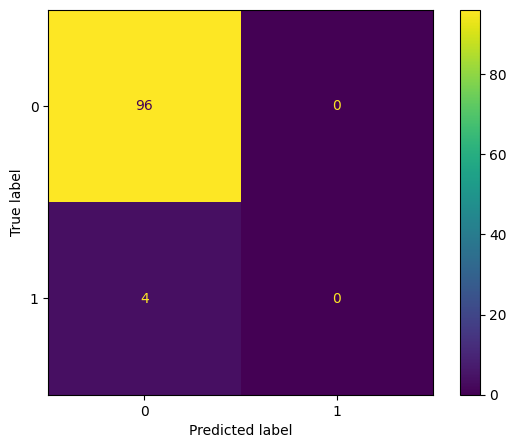

In [67]:
fig, ax = plt.subplots(figsize=(7,5))
cmd=ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=model.classes_)
cmd.plot(ax=ax);

In [66]:
print(classification_report(y_true=y_test, y_pred=y_test_pred_best))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        96
           1       0.00      0.00      0.00         4

    accuracy                           0.96       100
   macro avg       0.48      0.50      0.49       100
weighted avg       0.92      0.96      0.94       100



C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Outstanding!